In [1]:
# necessary imports

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import wrangle
import explore

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Acquire

- NOTE: This dataset came from Kaggle pre-split in two .csvs files: train and test

### Acquire Takeaways
- Very clean data
- Only two columns are comprised of nulls: "num_outbound_cmds" and "is_host_login"

In [2]:
# Acquire the data

train = wrangle.get_train_df()

In [3]:
test = wrangle.get_test_df()

In [4]:
# Take a look at the data

train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
# Quantify the data

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

Training data has 25192 rows & 42 columns


In [6]:
# More detail - no null values

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
duration                       25192 non-null int64
protocol_type                  25192 non-null object
service                        25192 non-null object
flag                           25192 non-null object
src_bytes                      25192 non-null int64
dst_bytes                      25192 non-null int64
land                           25192 non-null int64
wrong_fragment                 25192 non-null int64
urgent                         25192 non-null int64
hot                            25192 non-null int64
num_failed_logins              25192 non-null int64
logged_in                      25192 non-null int64
num_compromised                25192 non-null int64
root_shell                     25192 non-null int64
su_attempted                   25192 non-null int64
num_root                       25192 non-null int64
num_file_creations             25192 non-null int64
num_

In [7]:
# Descriptive statistics

train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


## Data Prep

### Prep Takeaways
- I chose to limit outliers very conservatively because in this case the outliers ARE the story
- The only dummies that I created were from 'class': I created an 'anomaly' column and a 'normal' column, with 'anomaly' being the target variable
- For the 'service' column, I dropped any service that had less than 600 occurances, as it still gave me plenty of anomalies
- 

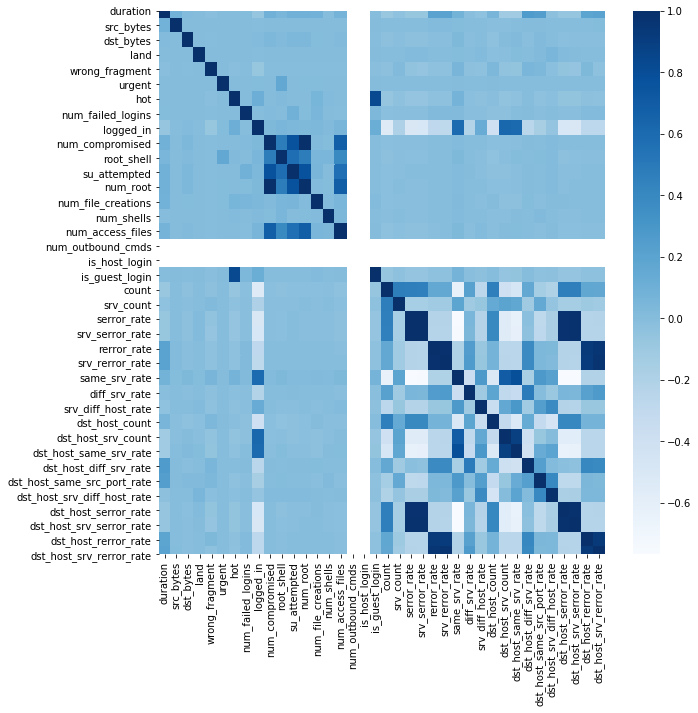

In [8]:
# Inspect correlation to determine columns to drop

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(train.corr(),cmap="Blues")

In [10]:
# Wrangle the data

train = wrangle.wrangle_nids(train)

In [11]:
test = wrangle.wrangle_nids(test)

In [12]:
# Look at the remaining columns

train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
count,25192.0,84.591180,1.146735e+02,1.0,2.00,14.00,144.00,511.0
srv_count,25192.0,27.698754,7.246824e+01,1.0,2.00,8.00,18.00,511.0
same_srv_rate,25192.0,0.660559,4.396374e-01,0.0,0.09,1.00,1.00,1.0
diff_srv_rate,25192.0,0.062363,1.785500e-01,0.0,0.00,0.00,0.06,1.0
dst_host_count,25192.0,182.532074,9.899390e+01,0.0,84.00,255.00,255.00,255.0
dst_host_srv_count,25192.0,115.063036,1.106469e+02,0.0,10.00,61.00,255.00,255.0


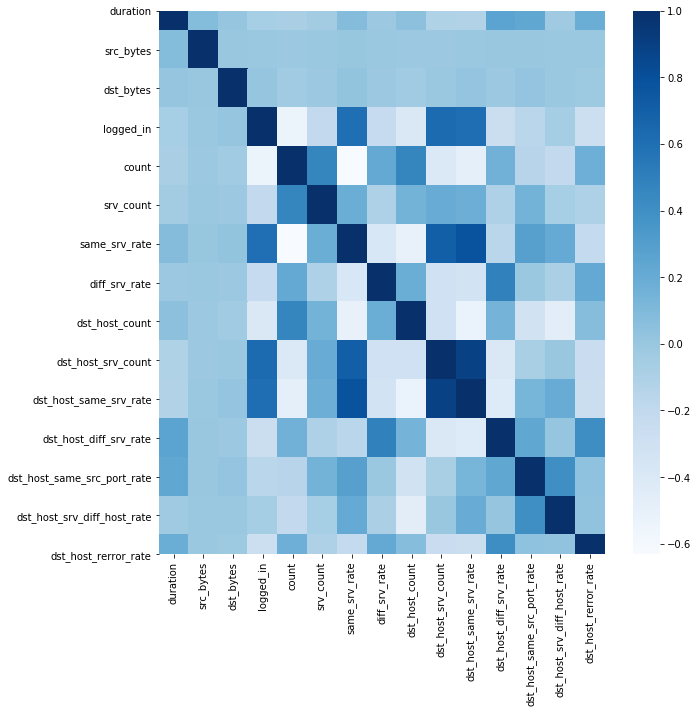

In [13]:
# Re-inspect correlation to determine additional columns to drop
d
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(train.corr(),cmap="Blues")

In [14]:
# Take a look at our object types

train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [15]:
train['service'].value_counts()

http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64

In [16]:
train['protocol_type'].value_counts()

tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64

In [17]:
train['flag'].value_counts()

SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64

In [18]:
# Create dummy variables for class
dummy_df = pd.get_dummies(train['class'], drop_first=False)

# Rename dummy column
dummy_df.columns = ['anomaly', 'normal']

# Merge data frames togeter
train = pd.concat([train, dummy_df], axis= 1)

# Drop "class" column
train.drop(columns=['class'], inplace=True) 

In [19]:
train.head(25)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,anomaly,normal
0,0,tcp,ftp_data,SF,491,0,0,2,2,1.00,0.00,150,25,0.17,0.03,0.17,0.00,0.05,0,1
1,0,udp,other,SF,146,0,0,13,1,0.08,0.15,255,1,0.00,0.60,0.88,0.00,0.00,0,1
2,0,tcp,private,S0,0,0,0,123,6,0.05,0.07,255,26,0.10,0.05,0.00,0.00,0.00,1,0
3,0,tcp,http,SF,232,8153,1,5,5,1.00,0.00,30,255,1.00,0.00,0.03,0.04,0.00,0,1
4,0,tcp,http,SF,199,420,1,30,32,1.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0,1
5,0,tcp,private,REJ,0,0,0,121,19,0.16,0.06,255,19,0.07,0.07,0.00,0.00,1.00,1,0
6,0,tcp,private,S0,0,0,0,166,9,0.05,0.06,255,9,0.04,0.05,0.00,0.00,0.00,1,0
7,0,tcp,private,S0,0,0,0,117,16,0.14,0.06,255,15,0.06,0.07,0.00,0.00,0.00,1,0
8,0,tcp,remote_job,S0,0,0,0,270,23,0.09,0.05,255,23,0.09,0.05,0.00,0.00,0.00,1,0
9,0,tcp,private,S0,0,0,0,133,8,0.06,0.06,255,13,0.05,0.06,0.00,0.00,0.00,1,0


In [20]:
counts = train['service'].value_counts()
counts

http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64

In [21]:
train = train[train['service'].isin(counts[counts > 500].index)]

## Data Exploration

In [22]:
quant_cols = ['dst_bytes', 'dst_host_srv_count', 'dst_host_same_srv_rate']
target = 'anomaly'
cat_cols = ['protocol_type', 'service', 'logged_in', 'normal']

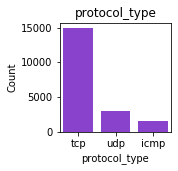

     protocol_type  Count  Percent
tcp            tcp  14898    76.80
udp            udp   2979    15.36
icmp          icmp   1522     7.85
_________________________________________________________________


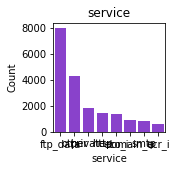

           service  Count  Percent
http      ftp_data   8003    41.25
private      other   4351    22.43
domain_u   private   1820     9.38
smtp          http   1449     7.47
ftp_data     eco_i   1396     7.20
eco_i     domain_u    909     4.69
other         smtp    858     4.42
ecr_i        ecr_i    613     3.16
_________________________________________________________________


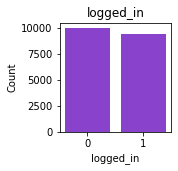

   logged_in  Count  Percent
0          0   9988    51.49
1          1   9411    48.51
_________________________________________________________________


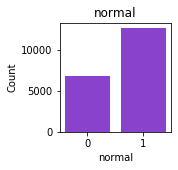

   normal  Count  Percent
1       1  12621    65.06
0       0   6778    34.94
_________________________________________________________________


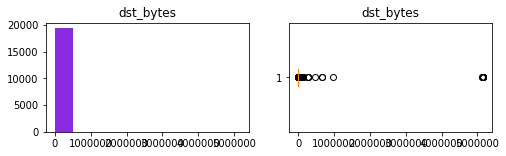

count    1.939900e+04
mean     3.758724e+03
std      9.840961e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.050000e+02
75%      9.550000e+02
max      5.151385e+06
Name: dst_bytes, dtype: float64


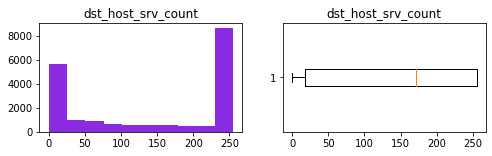

count    19399.000000
mean       145.139853
std        109.024191
min          0.000000
25%         18.000000
50%        172.000000
75%        255.000000
max        255.000000
Name: dst_host_srv_count, dtype: float64


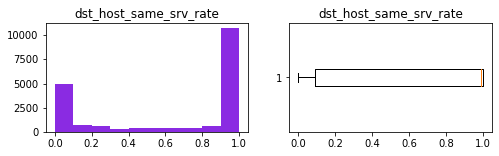

count    19399.000000
mean         0.650324
std          0.425816
min          0.000000
25%          0.090000
50%          0.990000
75%          1.000000
max          1.000000
Name: dst_host_same_srv_rate, dtype: float64


In [23]:
explore.explore_univariate(train, cat_cols, quant_cols)

## Univariate takeaways
- The most frequent protocol_type is 'tcp'
- The two leading services are 'ftp_data' and 'other'

In [24]:
# Scale the numerical data
scaler = StandardScaler()

# Extract numerical attributes and scale it to have zero mean and unit variance

cols = train.select_dtypes(include=['float64','int64']).columns
train_scaled = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
test_scaled = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# Turn the result back to a dataframe

traindf_scaled = pd.DataFrame(train_scaled, columns = cols)
testdf_scaled = pd.DataFrame(test_scaled, columns = cols)

In [25]:
traindf_scaled.head()

,duration,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate
0,-0.115366,-0.058634,-0.038196,-0.970686,-0.563786,-0.381497,0.553580,-0.299796,-0.163278,-1.101984,-1.128039,-0.260471,-0.038684,-0.323701,-0.183724
1,-0.115366,-0.060631,-0.038196,-0.970686,-0.463675,-0.393740,-1.862412,0.518870,0.854837,-1.322125,-1.527283,2.572414,2.081995,-0.323701,-0.361226
2,-0.115366,-0.061476,-0.038196,-0.970686,0.537432,-0.332528,-1.941195,0.082248,0.854837,-1.092812,-1.292434,-0.161071,-0.546452,-0.323701,-0.361226
3,-0.115366,-0.060133,0.044654,1.030200,-0.536483,-0.344771,0.553580,-0.299796,-1.326837,1.007694,0.821212,-0.409570,-0.456846,0.027967,-0.361226
4,-0.115366,-0.060324,-0.033928,1.030200,-0.308958,-0.014229,0.553580,-0.299796,0.854837,1.007694,0.821212,-0.409570,-0.546452,-0.323701,-0.361226


In [26]:
testdf_scaled.head()

,duration,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate
0,-0.155534,-0.021988,-0.096896,-0.890373,1.166764,-0.237191,-1.697859,-0.131492,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,1.979791
1,-0.155534,-0.021988,-0.096896,-0.890373,0.443234,-0.338246,-1.770589,-0.131492,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,1.979791
2,-0.154113,0.005473,-0.096896,-0.890373,-0.607053,-0.338246,0.629488,-0.363035,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.602719
3,-0.155534,-0.021946,-0.096896,-0.890373,-0.607053,0.380366,0.629488,-0.363035,-2.029801,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.602719
4,-0.154823,-0.021988,-0.096189,-0.890373,-0.607053,-0.259648,0.629488,-0.363035,-1.753304,-0.489800,-0.685647,0.360018,-0.333901,0.004234,1.540764


In [27]:
# Scale the categorical data 

encoder = LabelEncoder()

# Extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

# Encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# Separate target column from encoded data 
enctrain = traincat.drop(['anomaly'], axis=1)
cat_Ytrain = traincat[['anomaly']].copy()

KeyError: "['anomaly'] not found in axis"